# Práctica 4 - Regresión Polinomial
> Machine Learning and Artificial Intelligence - PhD Consuelo Varinia García Mendoza

> Daniel Armas Ramírez

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df = pd.read_csv('./datos.csv')
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True, train_size=0.7, test_size=0.3)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Regresión lineal con OLS

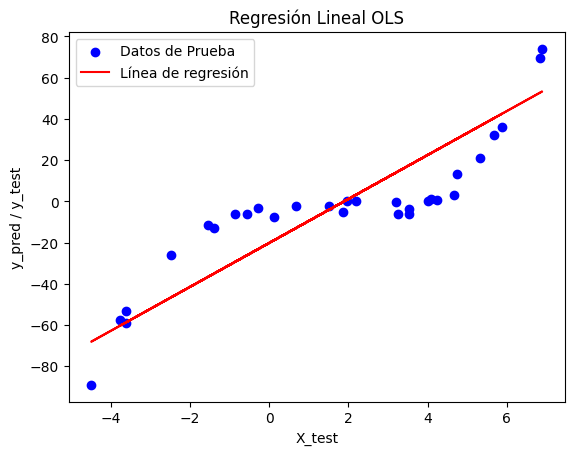

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


ols_data = ['Regresión Lineal con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Lineal OLS')
plt.legend()
plt.show()

### Regresión polinomial grado 2 con OLS

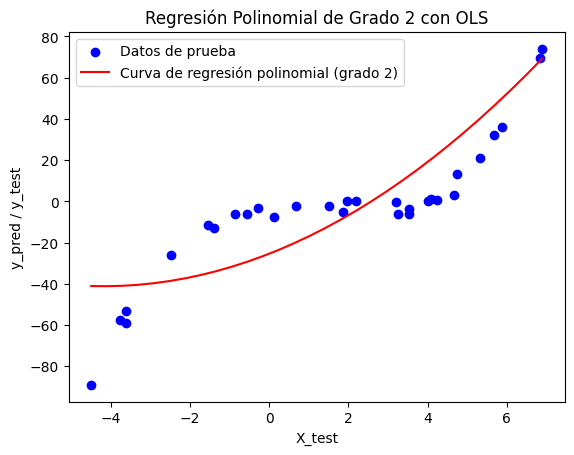

In [35]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg_model_2 = LinearRegression()
poly_reg_model_2.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_reg_model_2.predict(poly.transform(x_test))

ols_2_data = ['Regresión Polinomial de grado 2 con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 2)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 2 con OLS')
plt.legend()
plt.show()

### Regresión polinomial grado 3 con OLS

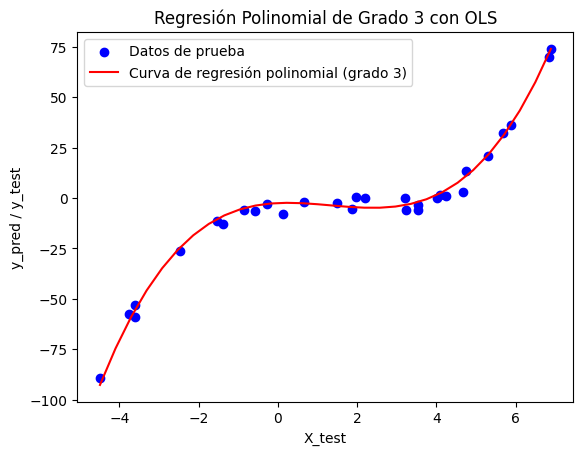

In [36]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg_model_3 = LinearRegression()
poly_reg_model_3.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_reg_model_3.predict(poly.transform(x_test))

ols_3_data = ['Regresión Polinomial de grado 3 con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 3)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 3 con OLS')
plt.legend()
plt.show()

### Regresión Lineal con SGD 

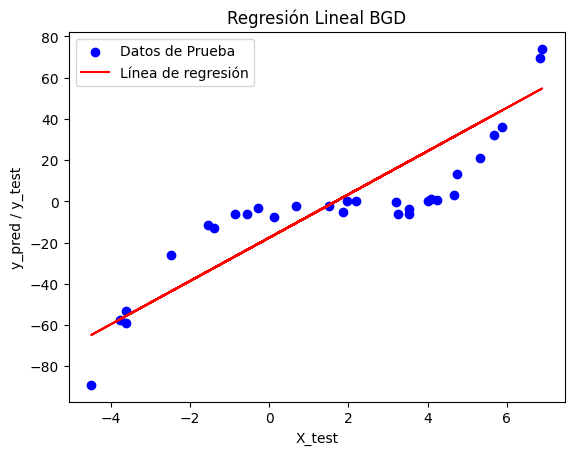

In [37]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)

y_pred = sgdr.predict(X_test)

sgd_data = ['Regresión Lineal con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Lineal BGD')
plt.legend()
plt.show()

### Regresión polinomial grado 2 con SGD

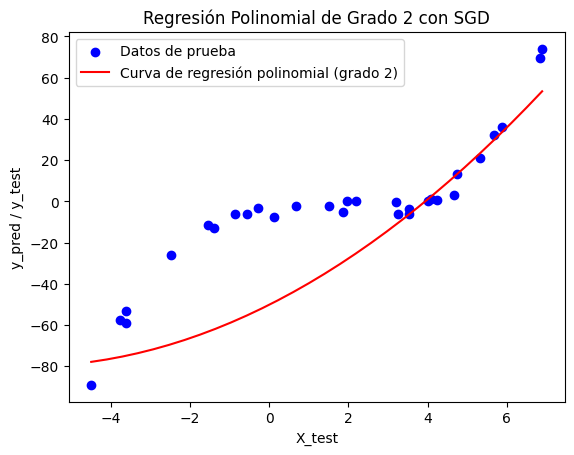

In [39]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_sgd_model_2 = SGDRegressor()
poly_sgd_model_2.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_sgd_model_2.predict(poly.transform(x_test))

sgd_2_data = ['Regresión Polinomial de grado 2 con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 2)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 2 con SGD')
plt.legend()
plt.show()

### Regresión polinomial grado 3 con SGD

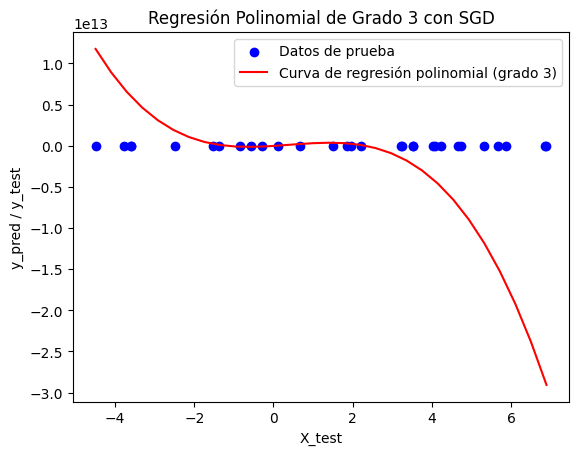

In [40]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_sgd_model_3 = SGDRegressor()
poly_sgd_model_3.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_sgd_model_3.predict(poly.transform(x_test))

sgd_3_data = ['Regresión Polinomial de grado 3 con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 3)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 3 con SGD')
plt.legend()
plt.show()

### Resultados

In [41]:
data = [ols_data, ols_2_data, ols_3_data, sgd_data, sgd_2_data, sgd_3_data]
results = pd.DataFrame(data, columns = ['Model', 'MSE', 'R^2'])
results

,Model,MSE,R^2
0,Regresión Lineal con OLS,2.960946e+02,7.198048e-01
1,Regresión Polinomial de grado 2 con OLS,2.149023e+03,-1.033627e+00
2,Regresión Polinomial de grado 3 con OLS,1.964920e+03,-8.594094e-01
3,Regresión Lineal con SGD,3.019398e+02,7.142735e-01
4,Regresión Polinomial de grado 2 con SGD,3.131605e+03,-1.963447e+00
5,Regresión Polinomial de grado 3 con SGD,8.698877e+25,-8.231773e+22


## Parte 2

In [44]:
df_2 = pd.read_csv('./cal_housing.csv')
X = df_2[['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']]
y = df_2['medianHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True, train_size=0.8, test_size=0.2)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Regresión Lineal

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
lireg = ['Regresión Lineal', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

### Regresión Polinomial Grado 2

In [50]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg = LinearRegression()
poly_reg.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 4128).reshape(-1, 1)

y_pred = poly_reg.predict(poly.transform(x_test))

ols_2_data = ['Regresión Polinomial de grado 2', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

ValueError: Found input variables with inconsistent numbers of samples: [132096, 16512]